In [298]:
#ignorando los warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Importando las librerías

In [299]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import silhouette_score


##  2. Leyendo los datos

In [300]:
dataset = pd.read_csv('..\datos_procesados\Mall_Customers_procesado.csv', sep=';')
dataset

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


## 3. Realizando el escalamiento de los datos

In [301]:
esc = MinMaxScaler()
#esc = RobustScaler()
dataset_esc = pd.DataFrame(esc.fit_transform(dataset), columns=dataset.columns.to_list())
dataset_esc

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0
...,...,...,...,...
195,0.326923,0.860656,0.795918,0.0
196,0.519231,0.909836,0.275510,0.0
197,0.269231,0.909836,0.744898,1.0
198,0.269231,1.000000,0.173469,1.0


## 4. Implementando la función para ejecutar el método elbow

In [302]:
#Construyendo una función que ejecute el método del elbow
def metodo_elbow(n_grupos:int, dataset:pd.DataFrame) -> None:
    """Función encargada de graficar la distorsión vs el número de grupos
    
    Parámetros de entrada:
    
    n_grupos:int -> Número de grupos que quiero visualizar
    dataset:pd.DataFrame -> Dataset al cual se le aplicará el análisis"""

    distortions = []
    for i in range(1,n_grupos+1):
        km = KMeans(
            n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0
        )

        km.fit(X=dataset)
        distortions.append(km.inertia_)

    %matplotlib inline
    plt.plot(lista_clusters, distortions, marker='o')
    plt.title('Método elbow')
    plt.xlabel('Número de clusters')
    plt.ylabel('Distortion')
    plt.grid()
    plt.show()

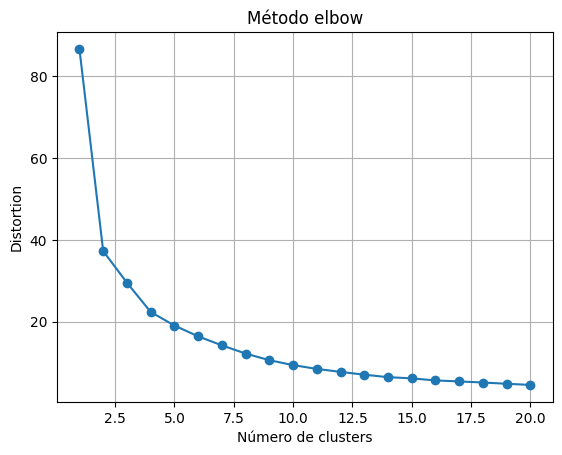

In [303]:
metodo_elbow(n_grupos=20, dataset=dataset_esc)

## 5. Implementando la función para ejecutar el método de las siluetas

In [304]:
#Construyendo una función que ejecute el método de las siluetas
def metodo_silueta(n_grupos:int, dataset:pd.DataFrame) -> None:
    """Función encargada de graficar el puntaje del coeficiente de siluetas vs
    el número de cluster (k)
    
    Parámetros de entrada:
    
    n_grupos:int -> Número de grupos que quiero visualizar
    dataset:pd.DataFrame -> Dataset al cual se le aplicará el análisis"""
    coef_siluetas_score = []
    for i in range(2, n_grupos+1):
        km = KMeans(
            n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0
        )
        y_km = km.fit_predict(X=dataset)
        coef_siluetas_score.append(silhouette_score(dataset, y_km, metric='euclidean'))
    
    %matplotlib inline
    plt.plot(range(2, n_grupos+1), coef_siluetas_score, marker='o')
    plt.title("Coeficiente de silueta Vs Número de cluster's")
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Puntaje coeficiente de silueta')
    plt.grid()
    plt.show()

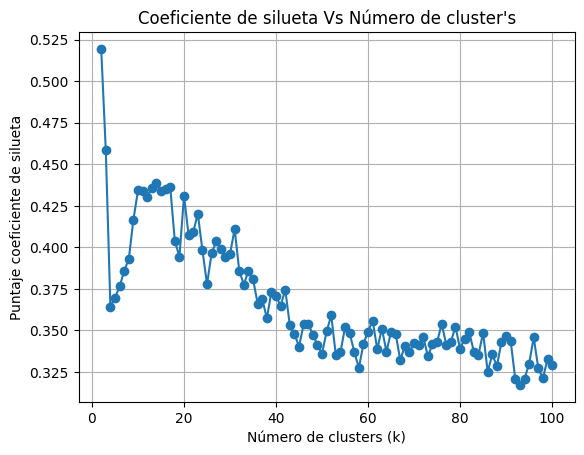

In [305]:
metodo_silueta(n_grupos=100, dataset=dataset_esc)

## 6. Aplicando PCA para reducir el número de variables

#### 6.1 Aplicando PCA a todos los componentes para verificar que tan bien captura la varianza de los datos

Suma acumulada de la varianza explicada:
[ 57.07689634  78.48183755  89.40993624 100.        ]


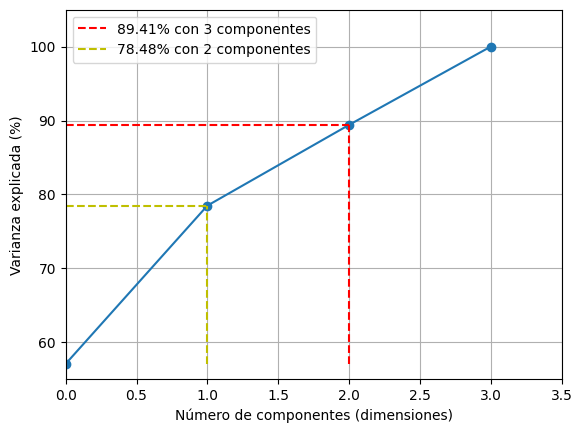

In [306]:
pca = PCA(n_components=None)
pca.fit(dataset_esc)

#Mostrando la suma acumulada del ratio de la varianza explicada
print('Suma acumulada de la varianza explicada:')
print(np.cumsum(pca.explained_variance_ratio_*100))

#Creando un plot para mostrar el impacto de la cantidad de componentes
%matplotlib inline
plt.plot(np.cumsum(pca.explained_variance_ratio_*100), marker='o')

plt.hlines(y=89.41, xmin=0, xmax=2, color='r', linestyle='--', label='89.41% con 3 componentes')
plt.vlines(x=2, ymin=57, ymax=89.41, colors='r', linestyles='--')

plt.hlines(y=78.48, xmin=0, xmax=1, colors='y', linestyles='--', label="78.48% con 2 componentes")
plt.vlines(x=1, ymin=57, ymax=78.48, colors='y', linestyles='--')

plt.xlabel("Número de componentes (dimensiones)")
plt.ylabel("Varianza explicada (%)")
plt.xlim([0,3.5])
plt.ylim([55,105])
plt.legend()
plt.grid()
plt.show()

#### 6.2 Eligiendo PCA con 3 componentes

In [307]:
pca_3 = PCA(n_components=3) 
columnas = ['PCA {}'.format(i) for i in range(3)]
dataset_pca_3 = pd.DataFrame(pca_3.fit_transform(dataset_esc), columns=columnas)
dataset_pca_3

,PCA 0,PCA 1,PCA 2
0,0.532955,-0.227841,0.321860
1,0.513939,-0.493080,-0.016202
2,-0.446266,0.087079,0.555761
3,-0.478796,-0.366617,-0.010714
4,-0.451984,0.003006,0.159208
...,...,...,...
195,-0.442610,-0.237388,-0.134542
196,-0.405571,0.256687,0.115348
197,0.555315,-0.316617,-0.056789
198,0.586009,0.071676,0.364057


#### 6.3 El método elbow con tres componentes

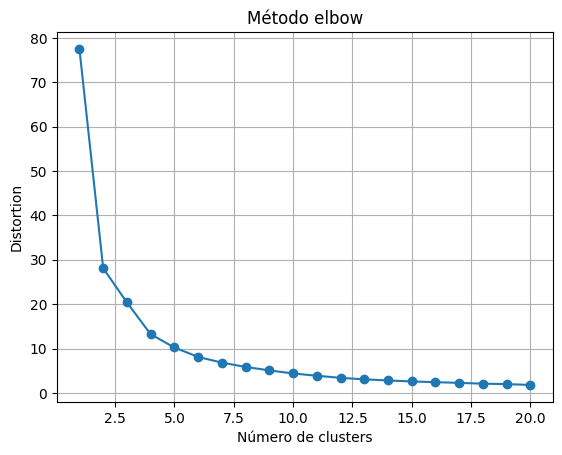

In [308]:
metodo_elbow(n_grupos=20, dataset=dataset_pca_3)

#### 6.4 Método de siluetas con tres componentes

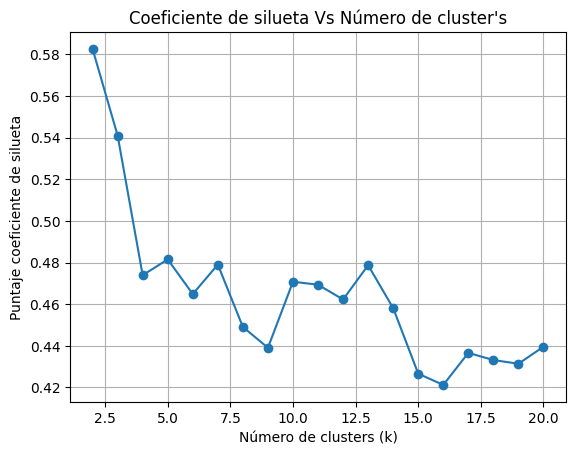

In [309]:
metodo_silueta(n_grupos=20, dataset=dataset_pca_3)

#### 6.5 Eligiendo *k=4* para realizar el agrupamiento

In [310]:
#Se agrupan los datos en cuatro clusters
km_4 = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=0
)

y_km_4 = km_4.fit_predict(X=dataset_pca_3)

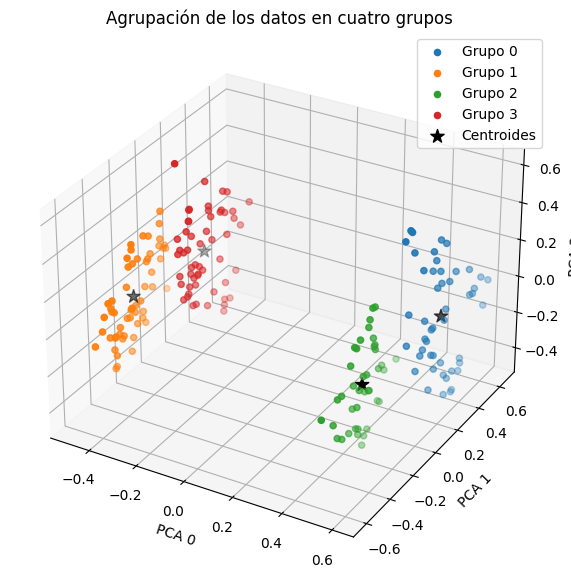

In [320]:
#Graficando los datos en 3D
%matplotlib inline
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

grupo_0 = dataset_pca_3[y_km_4==0]
grupo_1 = dataset_pca_3[y_km_4==1]
grupo_2 = dataset_pca_3[y_km_4==2]
grupo_3 = dataset_pca_3[y_km_4==3]

ax.scatter3D(xs=grupo_0['PCA 0'], ys=grupo_0['PCA 1'], zs=grupo_0['PCA 2'], label='Grupo 0')
ax.scatter3D(xs=grupo_1['PCA 0'], ys=grupo_1['PCA 1'], zs=grupo_1['PCA 2'], label='Grupo 1')
ax.scatter3D(xs=grupo_2['PCA 0'], ys=grupo_2['PCA 1'], zs=grupo_2['PCA 2'], label='Grupo 2')
ax.scatter3D(xs=grupo_3['PCA 0'], ys=grupo_3['PCA 1'], zs=grupo_3['PCA 2'], label='Grupo 3')
ax.scatter3D(xs=km_4.cluster_centers_[:,0], ys=km_4.cluster_centers_[:,1], zs=km_4.cluster_centers_[:,2], marker='*', s=100, color='black', label='Centroides')
ax.set_xlabel('PCA 0')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 2')
ax.set_title('Agrupación de los datos en cuatro grupos')
ax.legend()
plt.show()

#### 6.6 Eligiendo PCA con 2 componentes

In [312]:
pca_2 = PCA(n_components=2) 
columnas = ['PCA {}'.format(i) for i in range(2)]
dataset_pca_2 = pd.DataFrame(pca_2.fit_transform(dataset_esc), columns=columnas)
dataset_pca_2

,PCA 0,PCA 1
0,0.532955,-0.227841
1,0.513939,-0.493080
2,-0.446266,0.087079
3,-0.478796,-0.366617
4,-0.451984,0.003006
...,...,...
195,-0.442610,-0.237388
196,-0.405571,0.256687
197,0.555315,-0.316617
198,0.586009,0.071676


#### 6.7 El método elbow con dos componentes

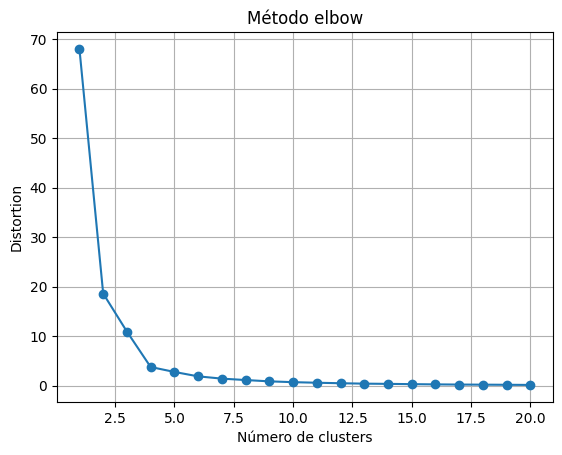

In [313]:
metodo_elbow(n_grupos=20, dataset=dataset_pca_2)

#### 6.8 El método de siluetas con dos componentes

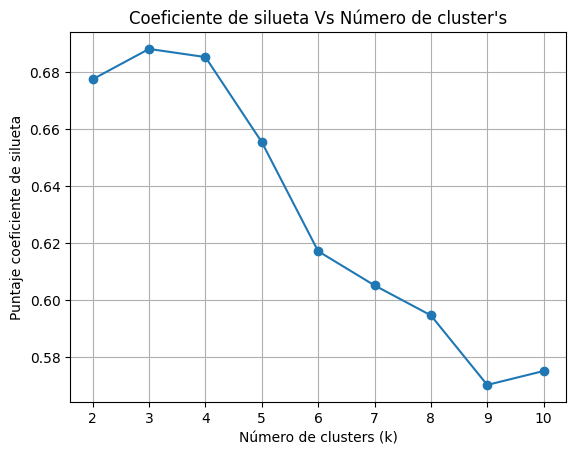

In [314]:
metodo_silueta(n_grupos=10, dataset=dataset_pca_2)

Utilizando el metodo elbow, se podría elegir un *k=4*. Con el método de silueta, se eligiría un *k=3*. Se continuará con el análisis con un *k=3*

#### 6.9 Eligiendo *k=3* para realizar el agrupamiento

In [315]:
#Se agrupan los datos en tres grupos
km_3 = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=0
)

y_km_3 = km_3.fit_predict(X=dataset_pca_2)

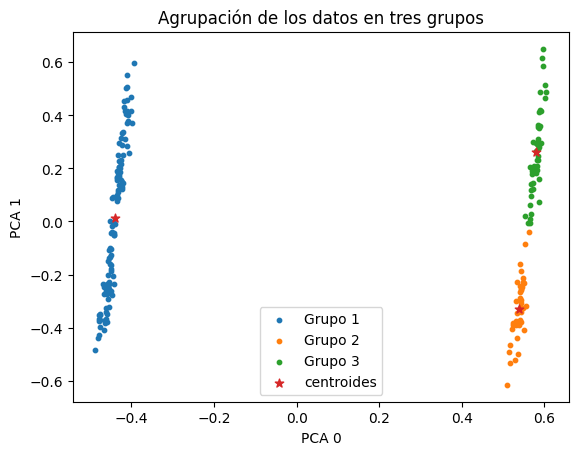

In [316]:
#Graficando los datos en 2D
grupo_0 = dataset_pca_2[y_km_3==0]
grupo_1 = dataset_pca_2[y_km_3==1]
grupo_2 = dataset_pca_2[y_km_3==2]

plt.scatter(x=grupo_0['PCA 0'], y=grupo_0['PCA 1'], label='Grupo 1', s=10)
plt.scatter(x=grupo_1['PCA 0'], y=grupo_1['PCA 1'], label='Grupo 2', s=10)
plt.scatter(x=grupo_2['PCA 0'], y=grupo_2['PCA 1'], label='Grupo 3', s=10)
plt.scatter(x=km_3.cluster_centers_[:,0], y=km_3.cluster_centers_[:,1], s=40, marker='*', label='centroides')
plt.title('Agrupación de los datos en tres grupos')
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
plt.legend()
plt.show()